#### **Ejercicio:** Desafío KNN

**Elaborado por:** Fabian Villarreal Sosa

El conjunto de datos se encuentra aquí. Tienes dos tareas principales. 

1. La primera tarea es utilizar el conjunto de datos del abulón para predecir la edad del abulón a partir de mediciones físicas utilizando KNN. Este es un problema de regresión. Es posible que desees buscar en Google "KNN regression scikit-learn". 
2. La segunda tarea es utilizar el conjunto de datos de abulón para predecir el sexo a partir de sus características. Esta debería ser una tarea más fácil, ya que ya hemos repasado la clasificación KNN usando Python.

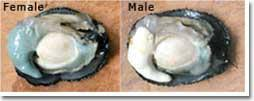

Una vez que hayas completado las dos tareas, responde las siguientes preguntas.

1. ¿Podrías haber utilizado la regresión lineal y la regresión KNN para resolver el problema de regresión?
2. ¿Podrías haber utilizado la regresión lineal para el problema de clasificación?

In [145]:
# Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from google.colab import drive

In [146]:
# Acceder a directorio en Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
# Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/Datos')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Datos'

In [148]:
# Cargar datos
column_names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 
                'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df=pd.read_csv('abalone.data', names=column_names)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [149]:
df.shape
# Se tienen 4,177 registros

(4177, 9)

In [150]:
# Valores perdidos
columns_nans=df.columns[df.isna().any()]
columns_nans

Index([], dtype='object')

In [151]:
df.isna().sum()
# No hay valores perdidos

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [152]:
# Descripcion de base de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [153]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [154]:
df['sex'].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [155]:
# La variable de 'sexo' es de tipo string, por lo que se requiere transformarla 
# para poder implementarla en los modelos (como una variable categorica)

In [156]:
# Cambiar 'sex' a variable categorica
df['sex']=df['sex'].map({'M': 0,
                         'F': 1,
                         'I': 2})

In [157]:
# Obtener variables dummies para representar las categorias de 'sex'
# pd.get_dummies(df['sex'])

In [158]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**1 Predecir la edad del abulón a partir de mediciones físicas utilizando KNN**

https://www.kaggle.com/errearanhas/knn-regression-bagging-on-abalone-data

In [159]:
# Variables explicativas
X_var=['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
X=df.loc[:, X_var]
X.shape

(4177, 7)

In [160]:
# Variable dependiente
y=df['rings'].values
y.shape

(4177,)

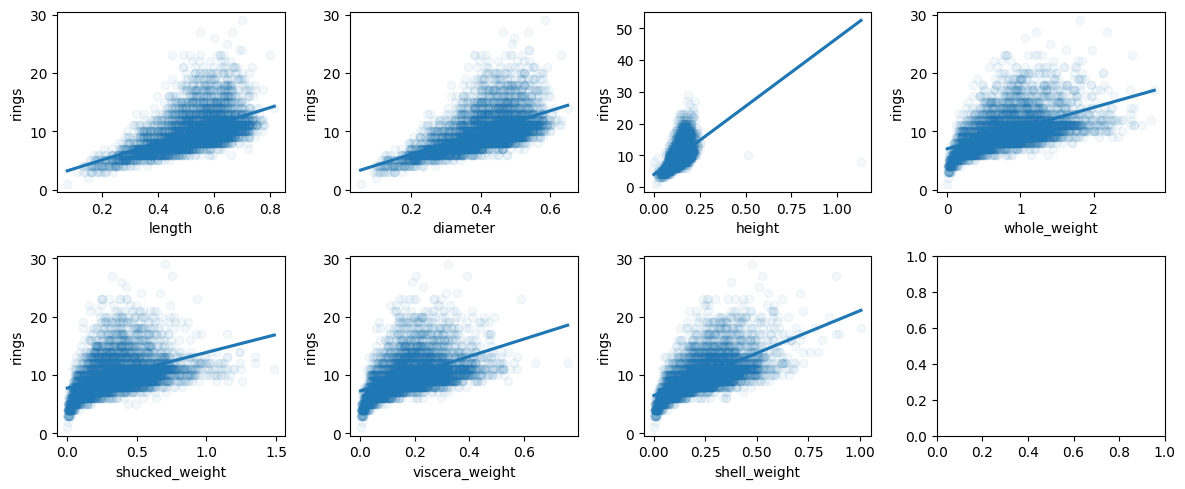

In [161]:
fig, axes=plt.subplots(nrows=2, ncols=4, figsize=(12,5), dpi=100)
sns.regplot(data=df, x='length', y='rings', ci=None, scatter_kws={'alpha': 0.05}, ax=axes[0,0])
sns.regplot(data=df, x='diameter', y='rings', ci=None, scatter_kws={'alpha': 0.05}, ax=axes[0,1])
sns.regplot(data=df, x='height', y='rings', ci=None, scatter_kws={'alpha': 0.05}, ax=axes[0,2])
sns.regplot(data=df, x='whole_weight', y='rings', ci=None, scatter_kws={'alpha': 0.05}, ax=axes[0,3])
sns.regplot(data=df, x='shucked_weight', y='rings', ci=None, scatter_kws={'alpha': 0.05}, ax=axes[1,0])
sns.regplot(data=df, x='viscera_weight', y='rings', ci=None, scatter_kws={'alpha': 0.05}, ax=axes[1,1])
sns.regplot(data=df, x='shell_weight', y='rings', ci=None, scatter_kws={'alpha': 0.05}, ax=axes[1,2])
fig.tight_layout()

In [162]:
# Bases de entrenamiento y de prueba
np.random.seed(2731) # Semilla
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [163]:
# class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

# Regression based on k-nearest neighbors.
# The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [164]:
# La opcion por default del numero de vecinos es 5. No obstante, esto puede no ser lo optimo.
# De tal forma, se utiliza la funcion 'GridSearchCV' de scikit-learn para determinar la cantidad de vecinos optimos.
# Adicionalmente, el uso de pesos uniformes a cada observacion puede no ser apropiado, debido a que no considera la influencia de la distancia de las observaciones
# Por tal motivo, tambien se implementa un peso basado en la distancia

from sklearn.model_selection import GridSearchCV

np.random.seed(2731) # Semilla

# Modelo
knn_reg=KNeighborsRegressor()

# Parametros a evaluar en la funcion 'GridSearchCV'
parameters={'n_neighbors': range(2, 40, 1), # Probar cantidad de vecinos de 2 a 40
            'weights': ['uniform', 'distance']} # Pesos a considerar

# Determinacion y ejecucion del modelo
gridsearch_knn=GridSearchCV(knn_reg, parameters, cv=10)
gridsearch_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 40),
                         'weights': ['uniform', 'distance']})

In [165]:
# Resultado del modelo
gridsearch_knn.best_params_
# Dada la muestra de entrenamiento, la cantidad optima de vecinos (K) es 25, considerando un peso basado en el inverso de la distancia

{'n_neighbors': 25, 'weights': 'distance'}

Modelo KNeighborsRegressor

In [166]:
# Regresion KNeighborsRegressor
k_opt=gridsearch_knn.best_params_['n_neighbors']
w_opt=gridsearch_knn.best_params_['weights']

In [167]:
# Definicion del modelo
knn_regress=KNeighborsRegressor(n_neighbors=k_opt, weights=w_opt)

In [168]:
# Estimacion del modelo
np.random.seed(2731) # Semilla
knn_regress.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=25, weights='distance')

In [169]:
# Predicciones
rings_hat_train=knn_regress.predict(X_train)
rings_hat_test=knn_regress.predict(X_test)

In [170]:
# Coeficiente de determinacion de la prediccion
score_train=knn_regress.score(X_train, y_train)
score_test=knn_regress.score(X_test, y_test)

print('Score Train:', round(score_train,3))
print('Score Test:', round(score_test,3)) # El modelo no predice muy bien en la base de prueba

Score Train: 1.0
Score Test: 0.551


In [171]:
# Predicciones con la base de entrenamiento
df_train={'rings_train': y_train, 
          'rings_hat_train': rings_hat_train}

pd.DataFrame(data=df_train, dtype=np.int64)

,rings_train,rings_hat_train
0,11,11
1,9,9
2,8,8
3,9,9
4,8,8
...,...,...
2918,12,12
2919,13,13
2920,9,9
2921,16,16


In [172]:
# Predicciones con la base de prueba
df_test={'rings_test': y_test, 
          'rings_hat_test': rings_hat_test}

pd.DataFrame(data=df_test, dtype=np.int64)

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:465: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  arrays, data_names, index, columns, dtype=dtype, typ=typ, consolidate=copy


,rings_test,rings_hat_test
0,11,8
1,11,10
2,10,9
3,10,9
4,9,8
...,...,...
1249,9,9
1250,9,8
1251,12,13
1252,10,10


In [173]:
# Estimacion del modelo con toda la base
np.random.seed(2731) # Semilla
knn_regress.fit(X, y)

KNeighborsRegressor(n_neighbors=25, weights='distance')

In [174]:
# Predicciones
rings_hat=knn_regress.predict(X)

In [175]:
# Coeficiente de determinacion de la prediccion
score=knn_regress.score(X, y)

print('Score:', round(score,3))

Score: 1.0


In [176]:
# Predicciones
df_hat={'rings': y, 
          'rings_hat': rings_hat}

pd.DataFrame(data=df_hat, dtype=np.int64)

,rings,rings_hat
0,15,15
1,7,7
2,9,9
3,10,10
4,7,7
...,...,...
4172,11,11
4173,10,10
4174,9,9
4175,10,10


**2 Predecir el sexo a partir de sus características**

In [177]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [178]:
# Variables explicativas (en este caso se omite la edad 'rings')
X_var=['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
X=df.loc[:, X_var]
X.shape

(4177, 7)

In [179]:
# Variable dependiente
y=df['sex'].values
y.shape

(4177,)

In [180]:
# Bases de entrenamiento y de prueba
np.random.seed(2731) # Semilla
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [181]:
# Al igual que en el literal 1, se procede a utilizar la funcion 'GridSearchCV' para determinar la cantidad optima de vecinos
# No obstante, en este caso se opta por el peso uniforme

np.random.seed(2731) # Semilla

# Modelo
knn_class=KNeighborsClassifier()

# Parametros a evaluar en la funcion 'GridSearchCV'
parameters={'n_neighbors': range(2, 40, 1)} # Probar cantidad de vecinos de 2 a 40

# Determinacion y ejecucion del modelo
gridsearch_knn=GridSearchCV(knn_class, parameters, cv=10)
gridsearch_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 40)})

In [182]:
# Resultado del modelo
gridsearch_knn.best_params_
# Dada la muestra de entrenamiento, la cantidad optima de vecinos (K) es 34, considerando un peso basado en el inverso de la distancia

{'n_neighbors': 29}

Modelo KNeighborsClassifier

In [183]:
# Regresion KNeighborsRegressor
k_opt=gridsearch_knn.best_params_['n_neighbors']

In [184]:
# Definicion del modelo
knn_class=KNeighborsClassifier(n_neighbors=k_opt)

In [185]:
# Estimacion del modelo
np.random.seed(2731) # Semilla
knn_class.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [186]:
# Predicciones
sex_hat_train=knn_class.predict(X_train)
sex_hat_test=knn_class.predict(X_test)

In [187]:
# Coeficiente de determinacion de la prediccion
score_train=knn_class.score(X_train, y_train)
score_test=knn_class.score(X_test, y_test)

print('Score Train:', round(score_train,3))
print('Score Test:', round(score_test,3))

Score Train: 0.594
Score Test: 0.547


In [188]:
# Predicciones con la base de entrenamiento
df_train={'sex_train': y_train, 
          'sex_hat_train': sex_hat_train}

df1=pd.DataFrame(data=df_train, dtype=np.int64)
df1

,sex_train,sex_hat_train
0,2,0
1,0,0
2,0,0
3,1,0
4,0,2
...,...,...
2918,1,2
2919,1,0
2920,1,2
2921,1,0


In [189]:
pd.crosstab(df1['sex_train'], df1['sex_hat_train'])

sex_hat_train,0,1,2
sex_train,,,
0,583,272,231
1,401,368,140
2,89,53,786


In [190]:
# Predicciones con la base de prueba
df_test={'sex_test': y_test, 
          'sex_hat_test': sex_hat_test}

df2=pd.DataFrame(data=df_test, dtype=np.int64)
df2

,sex_test,sex_hat_test
0,2,2
1,2,0
2,0,0
3,2,2
4,0,0
...,...,...
1249,1,0
1250,2,2
1251,1,1
1252,0,0


In [191]:
pd.crosstab(df2['sex_test'], df2['sex_hat_test'])

sex_hat_test,0,1,2
sex_test,,,
0,223,123,96
1,192,129,77
2,49,31,334


**3 Preguntas**

¿Podrías haber utilizado la regresión lineal y la regresión KNN para resolver el problema de regresión?

In [192]:
# El problema de regresion implico la existencia de una variable dependiente continua (no categorica). En este caso, 
# especificamente, la edad del abulon (variable cuantitativa). De esta forma, tanto una regresion lineal, como una
# regresion KNN pueden ser herramientas para abordar el problema de regresion y poder predecir la edad por medio de un
# conjunto de variables explicativas.

¿Podrías haber utilizado la regresión lineal para el problema de clasificación?

In [194]:
# No, debido a que el problema de clasificacion implica la presencia de una variable dependiente categorica o cualitativa.
# En este caso, a pesar de que la variable dependiente es numerica, el numero no representa una medicion, sino que representa
# una categoria, en este caso, especificamente, el sexo del abulon. De tal forma, la regresion lineal no es apropiada para
# abordar este problema.